In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [29]:
X = df.drop("sales",axis=1)
y = df["sales"]

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
polynomial_converter = PolynomialFeatures(degree = 5, include_bias = False)

poly_features = polynomial_converter.fit_transform(X)

In [37]:
poly_features.shape

(200, 55)

In [38]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X_train)
 

StandardScaler()

In [45]:
X_train_scaled = scaler.transform(X_train)

In [46]:
X_train_scaled

array([[ 0.49300171, -0.33994238,  1.61586707, ...,  0.00704484,
         0.36731969,  0.73567879],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.67449856,
         2.0763226 ,  1.3268794 ],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.42823202,
        -0.36509041, -0.32221291],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.42440306,
        -0.34885122, -0.26314509],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.4280649 ,
        -0.36507729, -0.32226899],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.24192258,
         0.16357974,  0.0357574 ]])

In [47]:
X_test_scaled = scaler.transform(X_test)

In [48]:
X_test_scaled

array([[-0.91339472,  1.76259419,  0.68168558, ...,  0.62770088,
         0.09523693, -0.14999627],
       [ 1.23121149,  0.23655959, -1.19601922, ..., -0.42768623,
        -0.36503783, -0.32226552],
       [-0.46002473, -0.40776614,  0.35005115, ..., -0.34929255,
        -0.2825677 , -0.24821148],
       ...,
       [-1.33115973,  1.19965698, -1.18200649, ..., -0.42673785,
        -0.36499105, -0.3222642 ],
       [ 1.3522684 , -0.23142436, -1.4389064 , ..., -0.42823197,
        -0.36509041, -0.32226987],
       [ 0.27818504, -0.06186496,  0.01841672, ..., -0.35649712,
        -0.31776442, -0.29546644]])

In [49]:
pd.DataFrame(X_train_scaled).agg(["mean","std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000
std,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004,1.004


In [50]:
pd.DataFrame(X_test_scaled).agg(["mean","std"]).round(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
mean,-0.183,-0.033,-0.086,-0.150,-0.151,-0.215,-0.023,-0.008,-0.038,-0.126,-0.116,-0.222,-0.093,-0.135,-0.177,-0.004,0.024,0.016,0.001,-0.108,-0.081,-0.219,-0.072,-0.152,-0.199,-0.053,-0.079,-0.116,-0.146,0.017,0.053,0.036,0.041,0.049,-0.096,-0.059,-0.215,-0.048,-0.155,-0.201,-0.040,-0.105,-0.146,-0.176,-0.021,-0.033,-0.079,-0.101,-0.115,0.037,0.079,0.055,0.050,0.080,0.108
std,1.051,1.023,1.055,1.009,1.045,0.756,1.057,1.074,1.130,0.982,1.047,0.649,1.058,0.844,0.613,1.090,1.106,1.149,1.378,0.961,1.030,0.568,1.069,0.724,0.461,1.093,0.935,0.684,0.555,1.124,1.147,1.127,1.390,1.736,0.941,1.008,0.507,1.065,0.634,0.376,1.118,0.815,0.517,0.332,1.135,1.036,0.759,0.603,0.566,1.159,1.193,1.111,1.308,1.749,2.159


In [52]:
from sklearn.linear_model import LinearRegression

In [54]:
lm = LinearRegression()

In [55]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [56]:
y_pred = lm.predict(X_train_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [58]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, "linear" )
ls

ValueError: Found input variables with inconsistent numbers of samples: [60, 140]

In [59]:
# Sadece sayısal sütunları seçmek ve korelasyon matrisini oluşturmak
correlation_matrix = pd.DataFrame(poly_features).corr()

# Korelasyon matrisini renklendirme fonksiyonu
def color_corr(val):
    """
    Korelasyon değerlerine göre hücre renklendirme fonksiyonu
    """
    color = ''
    if abs(val) == 1:
        color = 'background-color: #FF6666'  # Mükemmel Korelasyon için kırmızı
    elif 0.7 <= abs(val) < 1:
        color = 'background-color: #FFB266'  # Yüksek Korelasyon için turuncu
    elif 0.3 <= abs(val) < 0.7:
        color = 'background-color: #FFFF66'  # Orta Korelasyon için sarı
    elif 0.1 <= abs(val) < 0.3:
        color = 'background-color: #66FF66'  # Düşük Korelasyon için yeşil
    elif abs(val) == 0:
        color = 'background-color: #FFFFFF'  # Korelasyon yok için beyaz
    return color

# Stil uygulama ve korelasyon matrisini görüntüleme
styled_corr_matrix = correlation_matrix.style.applymap(color_corr)
styled_corr_matrix = styled_corr_matrix.format(precision=2)  # Sayısal biçimlendirme (2 ondalık basamak)
styled_corr_matrix.set_caption("Correlation Matrix ")
styled_corr_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,1.00,0.05,0.06,0.97,0.66,0.60,0.05,0.05,0.06,0.91,0.72,0.65,0.52,0.47,0.42,0.05,0.04,0.03,0.04,0.86,0.71,0.63,0.58,0.52,0.46,0.44,0.41,0.36,0.32,0.05,0.03,0.02,0.01,0.02,0.80,0.68,0.60,0.59,0.51,0.45,0.51,0.46,0.40,0.35,0.38,0.37,0.34,0.29,0.24,0.05,0.03,0.01,-0.00,-0.01,0.00
1,0.05,1.00,0.35,0.08,0.68,0.25,0.97,0.71,0.35,0.09,0.55,0.22,0.74,0.55,0.26,0.91,0.74,0.54,0.30,0.08,0.47,0.20,0.62,0.45,0.22,0.73,0.60,0.44,0.22,0.86,0.73,0.58,0.41,0.23,0.08,0.42,0.19,0.54,0.39,0.20,0.62,0.49,0.35,0.18,0.70,0.60,0.48,0.34,0.18,0.81,0.71,0.59,0.44,0.30,0.18
2,0.06,0.35,1.00,0.08,0.25,0.71,0.36,0.85,0.94,0.09,0.22,0.59,0.28,0.65,0.74,0.35,0.76,0.85,0.82,0.09,0.22,0.52,0.25,0.55,0.62,0.27,0.60,0.68,0.68,0.33,0.69,0.79,0.77,0.70,0.10,0.21,0.48,0.24,0.49,0.55,0.25,0.51,0.56,0.56,0.25,0.55,0.64,0.63,0.61,0.31,0.63,0.74,0.74,0.66,0.60
3,0.97,0.08,0.08,1.00,0.66,0.60,0.07,0.08,0.09,0.98,0.75,0.69,0.52,0.48,0.44,0.07,0.07,0.07,0.07,0.95,0.77,0.69,0.62,0.56,0.50,0.44,0.43,0.40,0.35,0.06,0.06,0.06,0.05,0.05,0.91,0.76,0.68,0.64,0.57,0.51,0.53,0.51,0.45,0.39,0.39,0.39,0.38,0.32,0.28,0.06,0.06,0.05,0.04,0.03,0.03
4,0.66,0.68,0.25,0.66,1.00,0.59,0.66,0.49,0.24,0.63,0.97,0.61,0.96,0.78,0.49,0.63,0.50,0.36,0.19,0.59,0.91,0.60,0.95,0.76,0.50,0.91,0.78,0.62,0.39,0.60,0.49,0.37,0.25,0.14,0.56,0.85,0.57,0.91,0.72,0.49,0.91,0.77,0.61,0.40,0.85,0.77,0.65,0.48,0.31,0.57,0.47,0.37,0.26,0.17,0.10
5,0.60,0.25,0.71,0.60,0.59,1.00,0.25,0.58,0.66,0.59,0.63,0.97,0.54,0.87,0.94,0.24,0.50,0.56,0.56,0.56,0.63,0.92,0.58,0.86,0.91,0.49,0.79,0.85,0.83,0.22,0.45,0.50,0.48,0.46,0.54,0.62,0.87,0.59,0.83,0.86,0.54,0.79,0.83,0.80,0.44,0.72,0.80,0.76,0.71,0.21,0.40,0.46,0.45,0.40,0.37
6,0.05,0.97,0.36,0.07,0.66,0.25,1.00,0.72,0.36,0.08,0.54,0.22,0.77,0.55,0.26,0.99,0.78,0.55,0.30,0.08,0.47,0.21,0.64,0.45,0.22,0.79,0.63,0.44,0.22,0.96,0.80,0.61,0.41,0.23,0.08,0.41,0.20,0.56,0.39,0.20,0.67,0.52,0.36,0.18,0.78,0.66,0.50,0.33,0.17,0.92,0.79,0.65,0.47,0.30,0.18
7,0.05,0.71,0.85,0.08,0.49,0.58,0.72,1.00,0.83,0.10,0.41,0.49,0.54,0.76,0.62,0.70,0.98,0.94,0.74,0.11,0.38,0.45,0.47,0.63,0.52,0.54,0.76,0.74,0.57,0.66,0.94,0.94,0.82,0.64,0.12,0.36,0.42,0.44,0.57,0.47,0.47,0.65,0.61,0.47,0.52,0.74,0.75,0.66,0.51,0.63,0.89,0.93,0.84,0.69,0.54
8,0.06,0.35,0.94,0.09,0.24,0.66,0.36,0.83,1.00,0.10,0.22,0.56,0.26,0.62,0.78,0.34,0.75,0.93,0.96,0.12,0.22,0.51,0.24,0.53,0.65,0.25,0.57,0.72,0.78,0.32,0.68,0.87,0.91,0.88,0.13,0.23,0.49,0.24,0.49,0.59,0.23,0.50,0.60,0.64,0.23,0.52,0.68,0.73,0.74,0.29,0.62,0.81,0.88,0.85,0.80
9,0.91,0.09,0.09,0.98,0.63,0.59,0.08,0.10,0.10,1.00,0.75,0.69,0.50,0.48,0.45,0.08,0.09,0.09,0.09,0.99,0.79,0.72,0.61,0.58,0.52,0.42,0.44,0.41,0.36,0.07,0.08,0.09,0.08,0.08,0.97,0.80,0.71,0.66,0.60,0.54,0.53,0.53,0.48,0.42,0.37,0.40,0.40,0.35,0.30,0.06,0.07,0.08,0.07,0.06,0.06


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF hesaplamasını poly_features üzerine yapmamız gerekmekte
# poly_features verisini DataFrame formatına dönüştürüyoruz
X_poly = pd.DataFrame(poly_features)

# Sonsuz değerleri NaN olarak işaretleyip temizliyoruz
# X_poly = X_poly.replace([np.inf, -np.inf], np.nan)
# X_poly = X_poly.dropna()

# VIF hesaplaması
vif_df_poly = pd.DataFrame()
vif_df_poly["Feature"] = X_poly.columns
vif_df_poly["VIF"] = [variance_inflation_factor(X_poly.values, i) for i in range(X_poly.shape[1])]

vif_df_poly

,Feature,VIF
0,0,15300.009387
1,1,9422.757098
2,2,9512.227411
3,3,256780.844957
4,4,52030.392751
5,5,52799.226843
6,6,150505.487805
7,7,65190.154943
8,8,133250.496358
9,9,914638.077273


In [60]:
from sklearn.metrics import get_scorer_names

scorers_list = get_scorer_names ()

print(scorers_list)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'd2_absolute_error_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_max_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples'

In [61]:
from sklearn.model_selection import cross_validate, cross_val_score

In [63]:
model = LinearRegression()

In [64]:
scores=cross_validate(model,X_train_scaled,y_train,
               scoring=['r2','neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
               cv=10,return_train_score=True)
scores

{'fit_time': array([0.00946522, 0.00712204, 0.01156163, 0.00503731, 0.00506401,
        0.00655556, 0.00698519, 0.00519633, 0.00540423, 0.0058496 ]),
 'score_time': array([0.01050496, 0.01123977, 0.00791502, 0.00628209, 0.00659609,
        0.00691152, 0.00712538, 0.00553894, 0.00556922, 0.00617337]),
 'test_r2': array([-0.28073372,  0.99301892,  0.9839342 ,  0.82527211,  0.99118105,
         0.96901174,  0.99288486,  0.99012982,  0.96550843,  0.9901235 ]),
 'train_r2': array([0.99802773, 0.99775353, 0.99795931, 0.99767279, 0.99768399,
        0.99791718, 0.99783495, 0.99760232, 0.99795114, 0.99756363]),
 'test_neg_mean_absolute_error': array([-1.99443016, -0.3770662 , -0.39231189, -0.97976652, -0.32225268,
        -0.48449274, -0.32795501, -0.44701511, -0.46502363, -0.32443256]),
 'train_neg_mean_absolute_error': array([-0.17088283, -0.18235186, -0.17584898, -0.18573603, -0.18615147,
        -0.17426497, -0.18087681, -0.18198699, -0.17546304, -0.19490624]),
 'test_neg_mean_squared_erro

In [65]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.009465,0.010505,-0.280734,0.998028,-1.994430,-0.170883,-31.328119,-0.051993,-5.597153,-0.228021
2,0.007122,0.011240,0.993019,0.997754,-0.377066,-0.182352,-0.250648,-0.056709,-0.500647,-0.238136
3,0.011562,0.007915,0.983934,0.997959,-0.392312,-0.175849,-0.306241,-0.055228,-0.553391,-0.235007
4,0.005037,0.006282,0.825272,0.997673,-0.979767,-0.185736,-4.402358,-0.061429,-2.098180,-0.247848
5,0.005064,0.006596,0.991181,0.997684,-0.322253,-0.186151,-0.166869,-0.060162,-0.408496,-0.245279
6,0.006556,0.006912,0.969012,0.997917,-0.484493,-0.174265,-0.976815,-0.053603,-0.988339,-0.231524
7,0.006985,0.007125,0.992885,0.997835,-0.327955,-0.180877,-0.144808,-0.058398,-0.380536,-0.241657
8,0.005196,0.005539,0.990130,0.997602,-0.447015,-0.181987,-0.332058,-0.060747,-0.576244,-0.246468
9,0.005404,0.005569,0.965508,0.997951,-0.465024,-0.175463,-0.528863,-0.055042,-0.727230,-0.234610
10,0.005850,0.006173,0.990123,0.997564,-0.324433,-0.194906,-0.197801,-0.065733,-0.444748,-0.256384


In [66]:
scores=pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                              0.842033
train_r2                             0.997797
test_neg_mean_absolute_error        -0.611475
train_neg_mean_absolute_error       -0.180847
test_neg_mean_squared_error         -3.863458
train_neg_mean_squared_error        -0.057904
test_neg_root_mean_squared_error    -1.227496
train_neg_root_mean_squared_error   -0.240493
dtype: float64

In [67]:
lm.coef_

array([  13.94208355,   -3.14784527,    0.62211693,  -58.34861425,
         17.22769511,   -3.87503073,   14.68801386,    0.83549441,
         -2.76582388,  115.5030865 ,  -28.6841704 ,   20.25759575,
         -7.33897897,  -19.84049142,    9.18338862,  -25.16298475,
        -16.85962816,   22.72378492,   -3.58116844, -103.95573376,
         28.8373088 ,  -35.71247488,   -3.67100676,   39.84916212,
        -15.89773511,    3.95679997,    5.3314373 ,    7.51623174,
        -14.30523704,   22.09544373,   23.11198084,  -12.0746903 ,
        -29.92034554,   22.77568382,   34.74282798,  -12.52775011,
         18.23102184,   11.0822807 ,  -24.33558184,   13.03946121,
        -11.73805841,    7.36908608,  -15.86507571,    8.17148819,
          8.93305381,  -10.07004967,    1.90458729,    7.06596667,
         -0.25747695,  -10.68987752,   -5.39010827,   -1.57858798,
         11.40089447,    6.35221543,  -13.45760268])

In [68]:
lm_df = pd.DataFrame(lm.coef_,columns=["lm_coef"])
lm_df

,lm_coef
0,13.942084
1,-3.147845
2,0.622117
3,-58.348614
4,17.227695
5,-3.875031
6,14.688014
7,0.835494
8,-2.765824
9,115.503087


In [69]:
from sklearn.linear_model import Ridge

In [70]:
ridge_model = Ridge(alpha=1)

In [71]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [72]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [74]:
rs = train_val(y_train,y_train_pred,y_test,y_pred,"ridge")
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [ ]:
ls

 Volume in drive C is Windows 10
 Volume Serial Number is F66B-28B7

 Directory of c:\Users\user\Desktop\ML

09/20/2025  05:34 PM    <DIR>          .
09/20/2025  05:34 PM    <DIR>          ..
09/17/2025  12:12 PM           841,615 01-ML -Simple Linear Regression - InClass- 02.11.2024-checkpoint.ipynb
09/16/2025  01:38 PM             4,012 Advertising.csv
09/16/2025  06:13 PM         2,710,811 ML Overview.png
09/25/2025  03:59 PM           663,116 ml.ipynb
09/18/2025  11:30 AM         3,448,051 ML_MultiLinear_Regression - Inclass- 04.11.2024.ipynb
09/19/2025  09:52 AM         3,352,526 ML_Polynomial Regression-Overfitting-Underfitting-08.11.2024.ipynb
09/23/2025  05:34 PM               112 README.md
               7 File(s)     11,020,243 bytes
               2 Dir(s)  24,351,158,272 bytes free


In [75]:
pd.concat([ls,rs],axis=1)

NameError: name 'ls' is not defined

In [76]:
model = Ridge(alpha=1)

scores = cross_validate(model, X_train_scaled, y_train, 
                        scoring = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                       cv=10, return_train_score=True)
scores

{'fit_time': array([0.00440502, 0.00371456, 0.00546455, 0.00346637, 0.00311756,
        0.00343442, 0.0033536 , 0.00317168, 0.00354266, 0.00333381]),
 'score_time': array([0.0099299 , 0.00967789, 0.01831412, 0.00588679, 0.00565267,
        0.00636077, 0.00837564, 0.00753832, 0.00813913, 0.00722909]),
 'test_r2': array([0.98919387, 0.98829427, 0.98039907, 0.9658537 , 0.99144978,
        0.91975333, 0.99301116, 0.99030046, 0.97582771, 0.99164186]),
 'train_r2': array([0.98794058, 0.98801002, 0.98857791, 0.98857948, 0.98765518,
        0.99253415, 0.98827844, 0.98743379, 0.98907438, 0.98790228]),
 'test_neg_mean_absolute_error': array([-0.43031178, -0.39946738, -0.41936987, -0.65677924, -0.34324028,
        -0.72358319, -0.29059586, -0.43447112, -0.44300946, -0.26948842]),
 'train_neg_mean_absolute_error': array([-0.34456115, -0.33275545, -0.35181864, -0.33021156, -0.34906149,
        -0.31727539, -0.34493593, -0.33406985, -0.34521612, -0.34955669]),
 'test_neg_mean_squared_error': array(

In [ ]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.008412,0.008491,-0.280734,0.998028,-1.994430,-0.170883,-31.328119,-0.051993,-5.597153,-0.228021
2,0.003960,0.012352,0.993019,0.997754,-0.377066,-0.182352,-0.250648,-0.056709,-0.500647,-0.238136
3,0.006995,0.007588,0.983934,0.997959,-0.392312,-0.175849,-0.306241,-0.055228,-0.553391,-0.235007
4,0.004744,0.006927,0.825272,0.997673,-0.979767,-0.185736,-4.402358,-0.061429,-2.098180,-0.247848
5,0.004510,0.006985,0.991181,0.997684,-0.322253,-0.186151,-0.166869,-0.060162,-0.408496,-0.245279
6,0.003001,0.006135,0.969012,0.997917,-0.484493,-0.174265,-0.976815,-0.053603,-0.988339,-0.231524
7,0.005195,0.003922,0.992885,0.997835,-0.327955,-0.180877,-0.144808,-0.058398,-0.380536,-0.241657
8,0.004226,0.006369,0.990130,0.997602,-0.447015,-0.181987,-0.332058,-0.060747,-0.576244,-0.246468
9,0.004466,0.003958,0.965508,0.997951,-0.465024,-0.175463,-0.528863,-0.055042,-0.727230,-0.234610
10,0.004734,0.007347,0.990123,0.997564,-0.324433,-0.194906,-0.197801,-0.065733,-0.444748,-0.256384


In [77]:
scores=pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                              0.978573
train_r2                             0.988599
test_neg_mean_absolute_error        -0.441032
train_neg_mean_absolute_error       -0.339946
test_neg_mean_squared_error         -0.561648
train_neg_mean_squared_error        -0.299841
test_neg_root_mean_squared_error    -0.666021
train_neg_root_mean_squared_error   -0.546325
dtype: float64

In [78]:
rs

,ridge_train,ridge_test
R2,0.988677,0.982511
mae,0.338149,0.482446
mse,0.297970,0.493743
rmse,0.545866,0.702669


In [79]:
ridge_model.coef_

array([ 3.42882194e+00,  6.89086255e-01,  1.70305310e-01, -9.10849850e-01,
        2.72307731e+00,  1.12909099e-01, -4.04686020e-01,  2.87949856e-01,
       -9.19372975e-02, -1.01453529e+00, -7.53444103e-02, -7.08634181e-01,
        1.47325425e+00,  1.48905234e-01,  5.40673712e-03, -4.71916072e-01,
        3.11276849e-02, -9.14237139e-02,  1.09396990e-01, -2.94351259e-01,
       -6.99938835e-02, -1.79886016e-01, -4.82892097e-01, -2.41549754e-01,
       -7.04618089e-02,  7.81238085e-01, -3.29077891e-02,  2.16163202e-03,
       -2.86797937e-02, -1.86742942e-01,  1.13037228e-02, -7.09241901e-02,
       -3.59743483e-02,  1.26281214e-01,  4.53132216e-01,  4.90793990e-01,
        4.92974171e-01, -2.88060554e-01,  2.71083972e-01,  3.21890659e-01,
       -8.29982648e-01, -2.03685335e-01,  1.35189763e-01, -9.80952741e-03,
        3.54289982e-01, -1.69829768e-01,  1.01346413e-01, -3.94717549e-02,
       -2.36644809e-01,  1.65346682e-01,  3.01969498e-02,  9.30440340e-03,
        2.46705050e-02, -

In [80]:
rm_df=pd.DataFrame(ridge_model.coef_,columns=["ridge_coef_1"])
rm_df

,ridge_coef_1
0,3.428822
1,0.689086
2,0.170305
3,-0.910850
4,2.723077
5,0.112909
6,-0.404686
7,0.287950
8,-0.091937
9,-1.014535


In [81]:
pd.concat([lm_df,rm_df],axis=1)

,lm_coef,ridge_coef_1
0,13.942084,3.428822
1,-3.147845,0.689086
2,0.622117,0.170305
3,-58.348614,-0.910850
4,17.227695,2.723077
5,-3.875031,0.112909
6,14.688014,-0.404686
7,0.835494,0.287950
8,-2.765824,-0.091937
9,115.503087,-1.014535


In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
alpha_space = np.linspace(0.01,1,100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [84]:
ridge_model = Ridge()

In [85]:
param_grid = {"alpha" : alpha_space}

In [86]:
grid_ridge = GridSearchCV(estimator = ridge_model, param_grid= param_grid, scoring= "neg_root_mean_squared_error", 
                         cv=10,  verbose=3, return_train_score=True)

In [87]:
grid_ridge.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10] END .alpha=0.01;, score=(train=-0.366, test=-0.483) total time=   0.0s
[CV 2/10] END .alpha=0.01;, score=(train=-0.345, test=-0.573) total time=   0.0s
[CV 3/10] END .alpha=0.01;, score=(train=-0.358, test=-0.663) total time=   0.0s
[CV 4/10] END .alpha=0.01;, score=(train=-0.368, test=-0.570) total time=   0.0s
[CV 5/10] END .alpha=0.01;, score=(train=-0.366, test=-0.378) total time=   0.0s
[CV 6/10] END .alpha=0.01;, score=(train=-0.274, test=-1.262) total time=   0.0s
[CV 7/10] END .alpha=0.01;, score=(train=-0.367, test=-0.331) total time=   0.0s
[CV 8/10] END .alpha=0.01;, score=(train=-0.368, test=-0.325) total time=   0.0s
[CV 9/10] END .alpha=0.01;, score=(train=-0.333, test=-0.735) total time=   0.0s
[CV 10/10] END alpha=0.01;, score=(train=-0.371, test=-0.545) total time=   0.0s
[CV 1/10] END .alpha=0.02;, score=(train=-0.388, test=-0.460) total time=   0.0s
[CV 2/10] END .alpha=0.02;, score=(train=-0.

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=3)

In [88]:
print(dir(grid_ridge))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__sklearn_clone__', '__sklearn_tags__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_build_request_for_signature', '_check_feature_names', '_check_n_features', '_check_refit_for_multimetric', '_doc_link_module', '_doc_link_template', '_doc_link_url_param_generator', '_estimator_type', '_format_results', '_get_default_requests', '_get_doc_link', '_get_metadata_request', '_get_param_names', '_get_routed_params_for_fit', '_get_scorers', '_get_tags', '_more_tags', '_parameter_constraints', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_run_search', '_se

In [89]:
grid_ridge.best_params_

{'alpha': np.float64(0.02)}

In [90]:
df_grid_ridge = pd.DataFrame(grid_ridge.cv_results_)
df_grid_ridge

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003868,0.001065,0.002842,0.001449,0.01,{'alpha': 0.01},-0.483099,-0.573140,-0.662998,-0.570154,-0.378272,-1.262311,-0.331072,-0.324546,-0.735112,-0.545124,-0.586583,0.259756,3,-0.366068,-0.344533,-0.358379,-0.367921,-0.365789,-0.273821,-0.366794,-0.367887,-0.333155,-0.371309,-0.351565,0.028368
1,0.003568,0.001265,0.002420,0.001243,0.02,{'alpha': 0.02},-0.459982,-0.585564,-0.679165,-0.491259,-0.379120,-1.279917,-0.349254,-0.344955,-0.728592,-0.385928,-0.568374,0.270049,1,-0.387516,-0.367130,-0.380186,-0.390567,-0.388323,-0.288794,-0.389428,-0.391929,-0.353711,-0.394658,-0.373224,0.030659
2,0.004299,0.002082,0.002939,0.001252,0.03,{'alpha': 0.03},-0.448626,-0.591197,-0.683641,-0.652494,-0.376404,-1.289903,-0.362661,-0.361567,-0.726250,-0.316422,-0.580916,0.276514,2,-0.401254,-0.381141,-0.393969,-0.404477,-0.403007,-0.299237,-0.403245,-0.406458,-0.367145,-0.409564,-0.386950,0.031774
3,0.003238,0.001284,0.001809,0.000688,0.04,{'alpha': 0.04},-0.440734,-0.593843,-0.684024,-0.804063,-0.374083,-1.297111,-0.372390,-0.373698,-0.724333,-0.279355,-0.594363,0.288458,4,-0.411467,-0.391366,-0.404004,-0.414236,-0.413850,-0.307017,-0.413109,-0.416729,-0.377152,-0.420434,-0.396936,0.032496
4,0.002938,0.000874,0.001620,0.000495,0.05,{'alpha': 0.05},-0.434872,-0.595071,-0.682619,-0.921712,-0.372465,-1.303041,-0.379618,-0.382858,-0.722420,-0.257836,-0.605251,0.301854,5,-0.419604,-0.399439,-0.411857,-0.421592,-0.422373,-0.313121,-0.420729,-0.424613,-0.385126,-0.428924,-0.404738,0.033029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.002996,0.000746,0.001868,0.000505,0.96,{'alpha': 0.9600000000000001},-0.509989,-0.645028,-0.611215,-0.943567,-0.400877,-1.582123,-0.377338,-0.565322,-0.611315,-0.403802,-0.665058,0.343451,96,-0.560229,-0.546313,-0.552231,-0.545298,-0.562591,-0.434831,-0.558403,-0.560577,-0.537614,-0.567691,-0.542578,0.036967
96,0.002459,0.000675,0.001688,0.000516,0.97,{'alpha': 0.97},-0.511032,-0.645844,-0.611219,-0.939496,-0.401215,-1.584227,-0.377280,-0.566811,-0.610675,-0.405147,-0.665295,0.343478,97,-0.561136,-0.547279,-0.553176,-0.546240,-0.563518,-0.435715,-0.559379,-0.561500,-0.538659,-0.568601,-0.543520,0.036979
97,0.003193,0.000963,0.001674,0.000568,0.98,{'alpha': 0.98},-0.512070,-0.646660,-0.611226,-0.935469,-0.401552,-1.586317,-0.377229,-0.568294,-0.610043,-0.406484,-0.665534,0.343513,98,-0.562040,-0.548241,-0.554116,-0.547179,-0.564442,-0.436594,-0.560352,-0.562418,-0.539699,-0.569507,-0.544459,0.036991
98,0.002561,0.000668,0.001552,0.000541,0.99,{'alpha': 0.99},-0.513102,-0.647476,-0.611236,-0.931484,-0.401889,-1.588392,-0.377183,-0.569771,-0.609417,-0.407813,-0.665776,0.343555,99,-0.562941,-0.549199,-0.555053,-0.548115,-0.565363,-0.437469,-0.561320,-0.563333,-0.540736,-0.570410,-0.545394,0.037004


In [91]:
df_grid_ridge[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.351565,0.586583
1,0.02,0.373224,0.568374
2,0.03,0.386950,0.580916
3,0.04,0.396936,0.594363
4,0.05,0.404738,0.605251
...,...,...,...
95,0.96,0.542578,0.665058
96,0.97,0.543520,0.665295
97,0.98,0.544459,0.665534
98,0.99,0.545394,0.665776


In [92]:
grid_ridge.best_index_

np.int64(1)

In [93]:
pd.DataFrame(grid_ridge.cv_results_).loc[1, ["mean_test_score", "mean_train_score"]]


mean_test_score    -0.568374
mean_train_score   -0.373224
Name: 1, dtype: object

In [94]:
grid_ridge.best_score_

np.float64(-0.5683736426878147)

In [96]:
y_pred = grid_ridge.predict(X_test_scaled)

y_train_pred = grid_ridge.predict(X_train_scaled)

In [97]:
rgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_ridge")
rgs

,grid_ridge_train,grid_ridge_test
R2,0.994491,0.983643
mae,0.244842,0.442087
mse,0.144977,0.461803
rmse,0.380758,0.679561


In [100]:
pd.concat([ls, rs, rgs], axis=1)

NameError: name 'ls' is not defined

In [99]:
rm = Ridge(alpha=0.02).fit(X_train_scaled, y_train)

In [101]:
rm.coef_

array([ 6.38304734e+00,  7.09275340e-01,  4.78837861e-01, -8.01548273e+00,
        3.99781291e+00, -7.14940285e-01, -5.09197284e-01,  7.27011610e-01,
       -8.83004868e-01,  2.24464524e+00, -3.19078191e+00, -8.74842987e-01,
        2.27543377e+00, -1.68730719e-01,  2.45578671e-01, -1.07397334e+00,
        7.07464247e-01, -1.51041420e+00,  1.39606956e+00,  3.19053345e+00,
        3.43601487e+00,  1.70954795e+00, -3.10657026e+00,  1.14268093e+00,
        3.21642379e-01,  1.73550780e+00, -9.42863852e-01, -4.20562003e-01,
       -3.39615652e-01, -4.52821031e-01,  5.50773131e-01, -9.34156866e-01,
        7.19128412e-02,  9.44445636e-01, -2.06804453e+00, -1.08621135e+00,
       -4.57557156e-01,  2.52819257e+00, -1.72169300e+00, -1.98950183e-01,
       -3.27642238e+00,  1.71668615e+00,  6.16710965e-01, -5.77460875e-03,
        1.41470288e+00, -9.16647115e-01, -1.48199234e-02,  5.87215930e-01,
       -4.21611654e-01,  5.23332129e-01, -4.18184387e-01,  3.63466766e-01,
        7.33072666e-01, -

In [ ]:
rgm_df = pd.DataFrame(rm.coef_,columns=["ridge_coef_0.02"])

In [ ]:
pd.concat([lm_df,rm_df,rgm_df],axis=1)

,lm_coef,ridge_coef_1,ridge_coef_0.02
0,13.942084,3.428822,6.383047
1,-3.147845,0.689086,0.709275
2,0.622117,0.170305,0.478838
3,-58.348614,-0.910850,-8.015483
4,17.227695,2.723077,3.997813
5,-3.875031,0.112909,-0.714940
6,14.688014,-0.404686,-0.509197
7,0.835494,0.287950,0.727012
8,-2.765824,-0.091937,-0.883005
9,115.503087,-1.014535,2.244645


In [116]:
from sklearn.linear_model import Lasso 

In [117]:
lasso_model = Lasso(alpha=1)

In [118]:
lasso_model.fit(X_train_scaled,y_train)

Lasso(alpha=1)

In [119]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [120]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [121]:
pd.concat([ls, rs, rgs, lss], axis = 1)

NameError: name 'ls' is not defined

In [122]:
model = Lasso(alpha=1)
scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

# Ridge modelde yaptığımız tüm işlemleri burda da tekrarlıyoruz.

In [123]:
pd.DataFrame(scores, index=range(1,11))

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
1,0.005586,0.008527,0.955947,0.918675,-0.888044,-1.021975,-1.077594,-2.143908,-1.038072,-1.464209
2,0.005835,0.011173,0.903583,0.915382,-1.372171,-1.030379,-3.461746,-2.136037,-1.860577,-1.461519
3,0.003819,0.011841,0.968382,0.921522,-0.565185,-1.019241,-0.602683,-2.123888,-0.776327,-1.457356
4,0.006990,0.048481,0.938413,0.919386,-0.813635,-1.027988,-1.551711,-2.127877,-1.245677,-1.458724
5,0.004439,0.049061,0.943817,0.915955,-0.847035,-1.045724,-1.063069,-2.183194,-1.031052,-1.477563
6,0.003495,0.008185,0.829658,0.925975,-1.304584,-1.021887,-5.369549,-1.905118,-2.317229,-1.380260
7,0.048541,0.009733,0.955279,0.920667,-0.689034,-1.024033,-0.910175,-2.139850,-0.954031,-1.462823
8,0.004553,0.011850,0.857451,0.918016,-1.790809,-0.996288,-4.795721,-2.077109,-2.189913,-1.441218
9,0.003689,0.009226,0.920257,0.918833,-0.901485,-1.004458,-1.222707,-2.180533,-1.105761,-1.476663
10,0.005911,0.020672,0.887138,0.921440,-1.218712,-0.999298,-2.260339,-2.119526,-1.503442,-1.455859


In [124]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:,2:].mean()

test_r2                              0.915992
train_r2                             0.919585
test_neg_mean_absolute_error        -1.039070
train_neg_mean_absolute_error       -1.019127
test_neg_mean_squared_error         -2.231529
train_neg_mean_squared_error        -2.113704
test_neg_root_mean_squared_error    -1.402208
train_neg_root_mean_squared_error   -1.453619
dtype: float64

In [125]:
lss

,lasso_train,lasso_test
R2,0.919650,0.918590
mae,1.018355,1.017959
mse,2.114491,2.298390
rmse,1.454129,1.516044


In [126]:
lasso_model.coef_

array([0.6960164 , 0.        , 0.        , 0.        , 3.49094634,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [127]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])


In [128]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)


NameError: name 'rgm_df' is not defined

In [139]:
lasso_model =Lasso()

In [138]:
param_grid = {"alpha" : alpha_space}

In [137]:
grid_lasso = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          verbose=1,
                          return_train_score=True)

In [140]:
grid_lasso.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [141]:
df_grid_lasso = pd.DataFrame(grid_lasso.cv_results_)

In [142]:
df_grid_lasso[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)

,param_alpha,mean_train_score,mean_test_score
0,0.01,0.536544,0.556615
1,0.02,0.615912,0.632106
2,0.03,0.677264,0.690849
3,0.04,0.695577,0.701827
4,0.05,0.717909,0.718893
...,...,...,...
95,0.96,1.420474,1.367504
96,0.97,1.428707,1.376116
97,0.98,1.436970,1.384772
98,0.99,1.445277,1.393470


In [143]:
pd.DataFrame(grid_lasso.cv_results_).loc[0, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.556615
mean_train_score   -0.536544
Name: 0, dtype: object

In [144]:
y_pred = grid_lasso.predict(X_test_scaled)
y_train_pred = grid_lasso.predict(X_train_scaled)

In [145]:
lgs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_lasso")
lgs

,grid_lasso_train,grid_lasso_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


In [146]:
pd.concat([ls, rs, rgs, lss, lgs], axis = 1)

NameError: name 'ls' is not defined

In [148]:
lsm = Lasso(alpha=0.01).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
lsm.coef_

array([ 4.2627502 ,  0.17822444,  0.13891524, -3.13777689,  4.16182023,
       -0.        ,  0.        ,  0.06332836,  0.        , -0.        ,
       -0.43751231, -0.17374222,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.48596042,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.06888897,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [149]:
lgm_df = pd.DataFrame(lsm.coef_, columns=["lasso_coef_0.01"])

In [150]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df], axis = 1)


NameError: name 'rgm_df' is not defined

In [151]:
from sklearn.linear_model import ElasticNet


In [152]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [153]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [154]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [155]:
pd.concat([ls,rs, rgs, lss, lgs, es], axis = 1)

NameError: name 'ls' is not defined

In [156]:
model = ElasticNet(alpha=1, l1_ratio=0.5) # default değerlerine göre

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

In [157]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.885455
train_r2                             0.896240
test_neg_mean_absolute_error        -1.291315
train_neg_mean_absolute_error       -1.248309
test_neg_mean_squared_error         -2.937091
train_neg_mean_squared_error        -2.727562
test_neg_root_mean_squared_error    -1.626465
train_neg_root_mean_squared_error   -1.651103
dtype: float64

In [158]:
es

,elastic_train,elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [159]:
elastic_model.coef_

array([ 0.8629361 ,  0.2114429 ,  0.        ,  0.29076735,  0.98099122,
        0.00249769,  0.        ,  0.        ,  0.        ,  0.        ,
        0.52021768,  0.        ,  0.6023984 ,  0.09615974,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.15970242,  0.        ,  0.27423182,  0.        ,  0.        ,
        0.3407246 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0826519 ,  0.        ,  0.        ,  0.        ,  0.15709256,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ])

In [160]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])


In [161]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df, lgm_df, em_df], axis = 1)


NameError: name 'rgm_df' is not defined

In [175]:
elastic_model = ElasticNet

In [173]:
param_grid = {"alpha":[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
            "l1_ratio":[0.1, 0.25, 0.5, 0.75, 0.9, 1]}

In [172]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =1, return_train_score=True)

In [176]:
grid_model.fit(X_train_scaled, y_train)

is_classifier


TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [177]:
grid_model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [178]:
df_grid_elastic = pd.DataFrame(grid_model.cv_results_)
df_grid_elastic[["param_alpha", "mean_train_score", "mean_test_score"]].apply(abs)

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [179]:
grid_model.best_index_

AttributeError: 'GridSearchCV' object has no attribute 'best_index_'

In [180]:
pd.DataFrame(grid_model.cv_results_).loc[5, ["mean_test_score", "mean_train_score"]]

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [181]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

TypeError: unbound method type.mro() needs an argument

In [182]:
egs = train_val(y_train, y_train_pred, y_test, y_pred, "grid_elastic")
egs

,grid_elastic_train,grid_elastic_test
R2,0.896126,0.902016
mae,1.248480,1.200654
mse,2.733565,2.766287
rmse,1.653350,1.663216


In [183]:
pd.concat([ls, rs, rgs, lss, lgs, egs], axis = 1)

NameError: name 'ls' is not defined

In [184]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [185]:
final_model = Lasso(alpha=0.01)

In [186]:
final_model.fit(X_scaled,y)

Lasso(alpha=0.01)

In [187]:
new_sample = [[50,75,125]]

In [188]:
poly_sample = polynomial_converter.transform(new_sample)
poly_sample

array([[5.00000000e+01, 7.50000000e+01, 1.25000000e+02, 2.50000000e+03,
        3.75000000e+03, 6.25000000e+03, 5.62500000e+03, 9.37500000e+03,
        1.56250000e+04, 1.25000000e+05, 1.87500000e+05, 3.12500000e+05,
        2.81250000e+05, 4.68750000e+05, 7.81250000e+05, 4.21875000e+05,
        7.03125000e+05, 1.17187500e+06, 1.95312500e+06, 6.25000000e+06,
        9.37500000e+06, 1.56250000e+07, 1.40625000e+07, 2.34375000e+07,
        3.90625000e+07, 2.10937500e+07, 3.51562500e+07, 5.85937500e+07,
        9.76562500e+07, 3.16406250e+07, 5.27343750e+07, 8.78906250e+07,
        1.46484375e+08, 2.44140625e+08, 3.12500000e+08, 4.68750000e+08,
        7.81250000e+08, 7.03125000e+08, 1.17187500e+09, 1.95312500e+09,
        1.05468750e+09, 1.75781250e+09, 2.92968750e+09, 4.88281250e+09,
        1.58203125e+09, 2.63671875e+09, 4.39453125e+09, 7.32421875e+09,
        1.22070312e+10, 2.37304688e+09, 3.95507812e+09, 6.59179688e+09,
        1.09863281e+10, 1.83105469e+10, 3.05175781e+10]])

In [189]:
scaled_sample = final_scaler.transform(poly_sample)
scaled_sample

array([[-1.13315340e+00,  3.49339891e+00,  4.34752066e+00,
        -1.03741578e+00,  7.74656058e-02,  3.39994914e-01,
         6.62763875e+00,  9.14005398e+00,  7.65017116e+00,
        -8.84105834e-01, -5.93274890e-01, -4.77103868e-01,
         1.12735021e+00,  1.87176397e+00,  1.55869684e+00,
         1.15348025e+01,  1.65567938e+01,  1.58428612e+01,
         1.12774804e+01, -7.59523810e-01, -6.42050637e-01,
        -5.51417623e-01, -2.56478338e-01, -4.80321352e-02,
        -5.97709542e-02,  2.54914159e+00,  4.03498293e+00,
         4.00945191e+00,  2.83092909e+00,  1.92716053e+01,
         2.86879320e+01,  2.96047003e+01,  2.33445411e+01,
         1.47899824e+01, -6.65453612e-01, -5.88272286e-01,
        -5.04584218e-01, -4.83608862e-01, -3.65939973e-01,
        -3.20620117e-01,  1.11147538e-01,  4.36097904e-01,
         4.60550271e-01,  2.79745221e-01,  4.69916666e+00,
         7.56821740e+00,  8.12052736e+00,  6.56720971e+00,
         4.18822722e+00,  3.14501491e+01,  4.81898711e+0

In [190]:
final_model.predict(scaled_sample)

array([16.63970974])

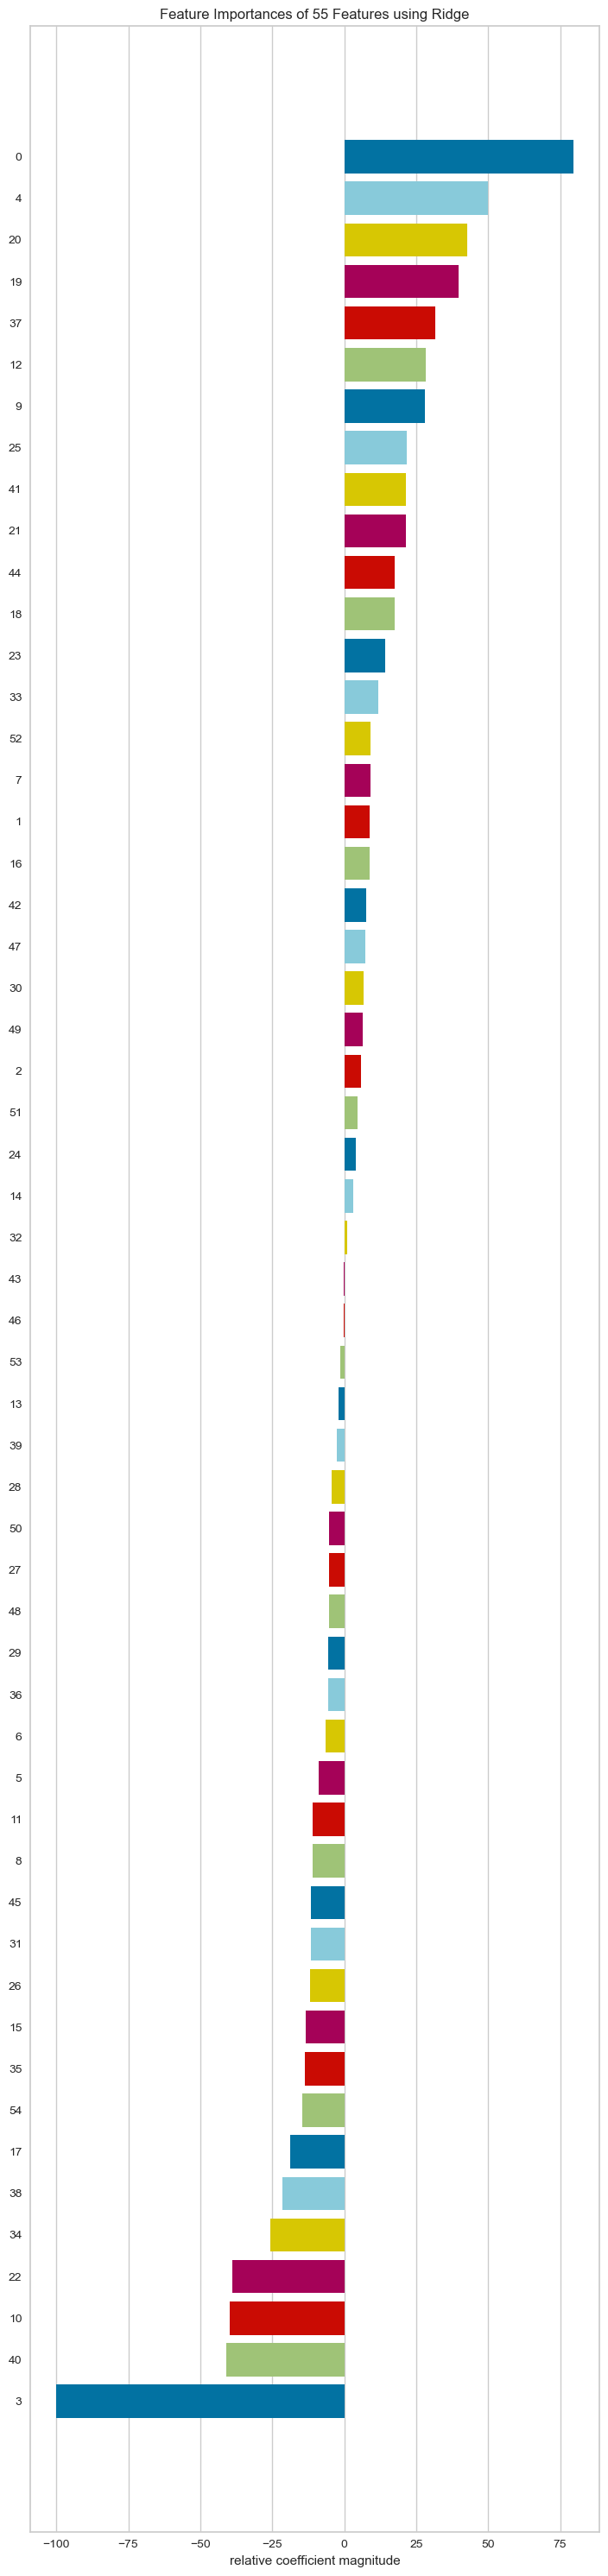

In [191]:
# pip install yellowbrick
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

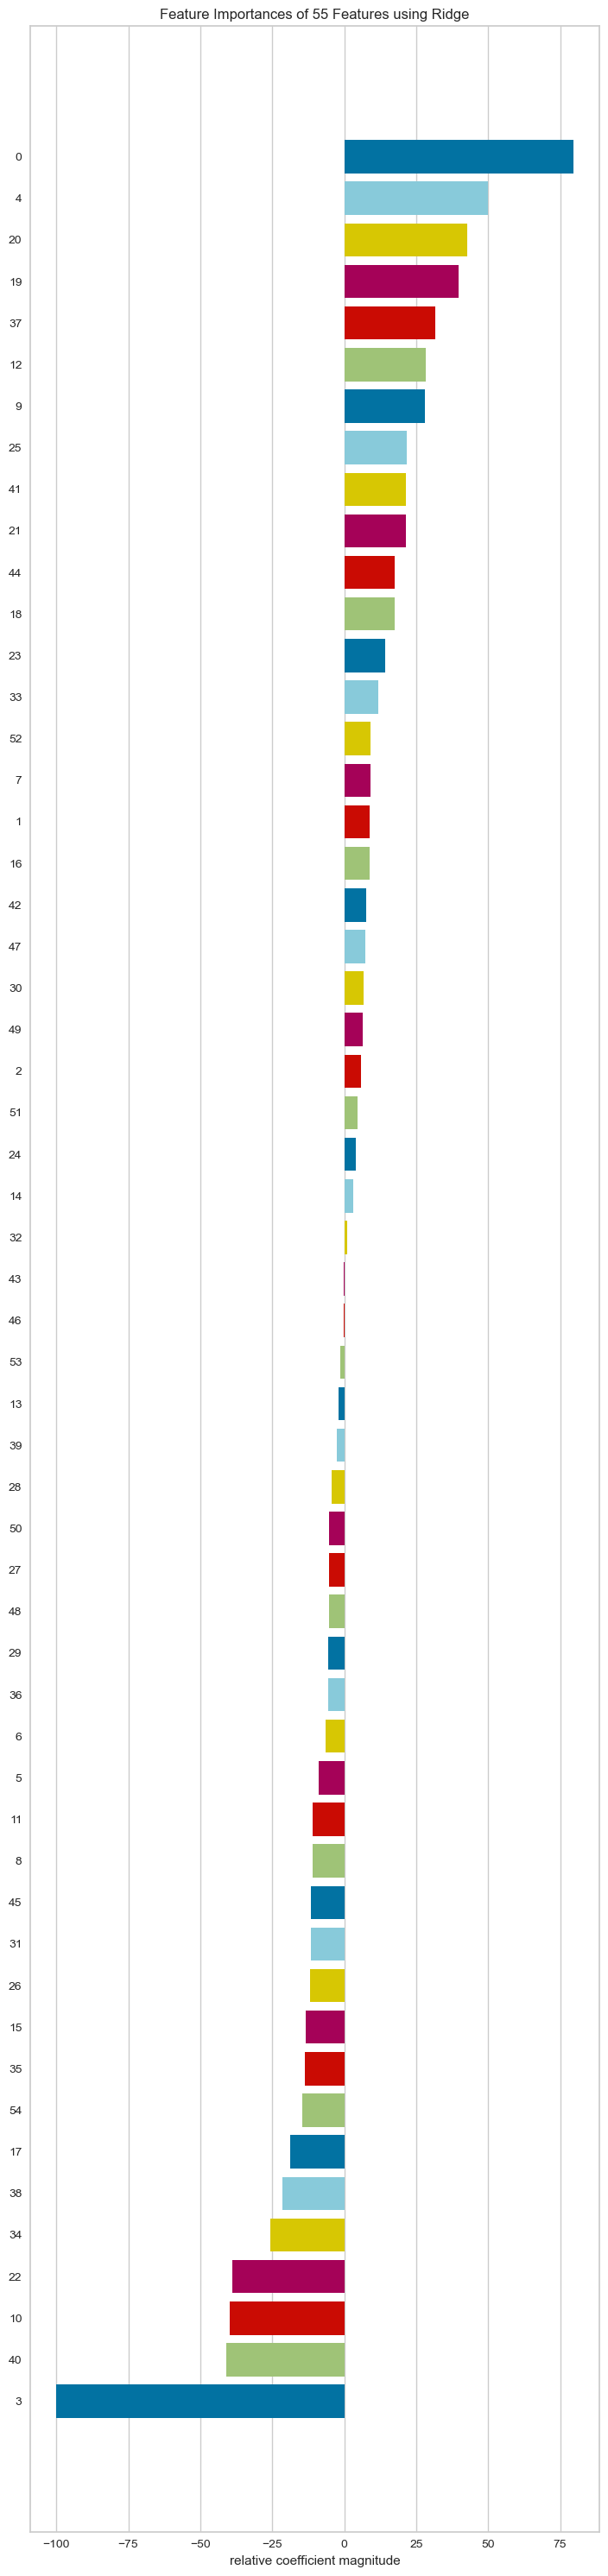

In [192]:
# pip install yellowbrick
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Ridge(alpha=0.02)

viz = FeatureImportances(model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [193]:
X_new = pd.DataFrame(poly_features)[[0, 3, 4]]
X_new

,0,3,4
0,230.1,52946.01,8697.78
1,44.5,1980.25,1748.85
2,17.2,295.84,789.48
3,151.5,22952.25,6256.95
4,180.8,32688.64,1952.64
...,...,...,...
195,38.2,1459.24,141.34
196,94.2,8873.64,461.58
197,177.0,31329.00,1646.10
198,283.6,80428.96,11911.20


In [194]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_new, y, test_size=0.3, random_state=101)


In [195]:
scaler_new = StandardScaler()
X_train_scaled2 = scaler_new.fit_transform(X_train2)
X_test_scaled2 = scaler_new.transform(X_test2)

In [196]:
lasso_model2 = Lasso(alpha=0.01)
lasso_model2.fit(X_train_scaled2, y_train2)

Lasso(alpha=0.01)

In [197]:
y_pred2 = lasso_model2.predict(X_test_scaled2)
y_train_pred2 = lasso_model2.predict(X_train_scaled2)

In [198]:
train_val(y_train2, y_train_pred2, y_test2, y_pred2, "lasso_new")


,lasso_new_train,lasso_new_test
R2,0.984226,0.980674
mae,0.420986,0.521575
mse,0.415107,0.545617
rmse,0.644288,0.738659


In [199]:
lgs

,grid_lasso_train,grid_lasso_test
R2,0.988820,0.986283
mae,0.339185,0.441091
mse,0.294202,0.387259
rmse,0.542404,0.622302


In [200]:
0.738659 / y.mean()  # 3 feature ile

np.float64(0.052676698163665533)

In [201]:
0.622302 / y.mean()  # 55 feature ile

np.float64(0.04437881975396684)